# Perkenalan
Nama/Batch : Sandika/008


# Import Pustaka

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import ttest_ind
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

# Data Loading

In [ ]:
df_dummy= pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df_dummy.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df= df_dummy.copy()

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

tidak ditemukan data yang memiliki value NaN

# EDA


In [ ]:
df_eda = df.copy()

2. Berapa % Attrition pada dataset tersebut?

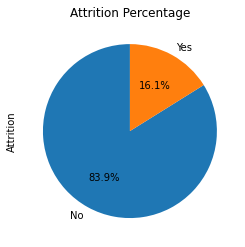

In [ ]:
fig6,ax6 = plt.subplots()

df_eda['Attrition'].value_counts(sort = True, normalize=True).plot(kind='pie',ax=ax6,autopct='%1.1f%%',startangle=90)

ax6.set_title('Attrition Percentage')  
plt.show()

16.1224 %

3. Umur berapa yang memiliki attration tertinggi?

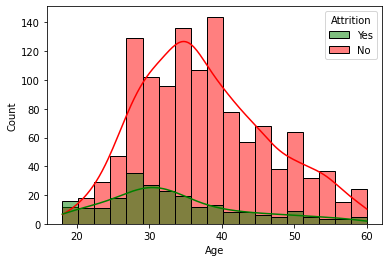

In [ ]:
sns.histplot(data = df, x ='Age' , hue = df['Attrition'], 
                 palette = {'Yes':'green', 'No':'red'}, kde = True)

Range 20-30

4. Apakah performance dan job satisfaction mempengaruhi attrition?

In [ ]:
data_num = df_eda[['JobSatisfaction','PerformanceRating']]
y_eda = df_eda['Attrition'].replace({'No':0,'Yes':1})


In [ ]:
#H0: Tidak ada pengaruh performance dan jobsatisfaction
#H1: Ada pengaruh performance dan jobsatisfaction
lab1_id = np.where(y==1)[0]
lab0_id = np.where(y==0)[0]

t,p_val = ttest_ind(data_num.iloc[lab1_id],data_num.iloc[lab0_id])

p_val_num = pd.DataFrame({'COLS':data_num.columns,'P-Value':p_val})
drop_cols = p_val_num[p_val_num['P-Value']>0.05]
drop_cols

,COLS,P-Value


Jawabannya berpengaruh karena tidak adanya argumen yang bisa mendukung hipotesis H0

5. Apakah yang memeliki income yang rendah, lebih cenderung Attrition?

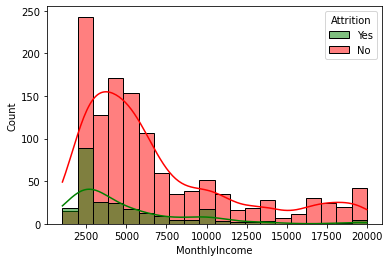

In [ ]:
sns.histplot(data = df, x ='MonthlyIncome' , hue = df['Attrition'], 
                 palette = {'Yes':'green', 'No':'red'}, kde = True)

tidak bisa dilihat dari grafik diatas semakin tinggi income semakin kecil juga Attritionnya

6. Apakah work life balance mempengaruhi tingkat attrition?

In [ ]:
data_num1 = df_eda[['WorkLifeBalance']]

In [ ]:
#H0: Tidak ada pengaruh worklife balance
#H1: Ada pengaruh worklife balance
lab1_id = np.where(y==1)[0]
lab0_id = np.where(y==0)[0]

t,p_val = ttest_ind(data_num1.iloc[lab1_id],data_num1.iloc[lab0_id])

p_val_num = pd.DataFrame({'COLS':data_num1.columns,'P-Value':p_val})
drop_cols = p_val_num[p_val_num['P-Value']>0.05]
drop_cols

,COLS,P-Value


Jawabannya berpengaruh karena tidak adanya argumen yang bisa mendukung hipotesis H0

# Data Preprocessing


In [ ]:
X = df.drop(['Attrition'], axis=1)
y = df[['Attrition']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [ ]:
kat = [col for col in X_train.columns if X_train[col].dtypes == 'O']
num = [col for col in X_train.columns if X_train[col].dtypes != 'O']
print('Numeric Columns:', num)
print('categorical Columns:', kat)

Numeric Columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical Columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [ ]:
df.duplicated().sum()

0

proses pencarian data yang terduplikat

In [ ]:
numerical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='mean')),
('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='most_frequent')),
('onehot', OneHotEncoder())
])

proses peembuatan pipeline

In [ ]:
preprocessor =  ColumnTransformer([
    ('numeric', numerical_pipeline,['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']),
    ('category', categorical_pipeline,['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'])
])

proses pembuatan preprocessor

# Model Training, Evaluation, & Definition

## Decision Tree

In [ ]:
pipeline_dt = Pipeline([
    ('prep',preprocessor),
    ('algo_dt',DecisionTreeClassifier())
])

In [ ]:
pipeline_dt.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education', 'EmployeeCount',
                                                   'EmployeeNumber',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
  

In [ ]:
parameter_dt= {
    'algo_dt__max_depth': [10, 100],
    'algo_dt__max_features': ['auto', 'log2']

}

Hyper Parameter tuning

In [ ]:
model_dt= GridSearchCV(pipeline_dt, parameter_dt, cv=3, n_jobs=-1, verbose=1)
model_dt.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Age',
                                                                          'DailyRate',
                                                                          'DistanceFromHome',
                                                                          'Education',
                                                                          'Employe

In [ ]:
pd.DataFrame(model_dt.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo_dt__max_depth,param_algo_dt__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.031408,0.001228,0.013274,0.000379,10,auto,"{'algo_dt__max_depth': 10, 'algo_dt__max_featu...",0.803571,0.785714,0.803571,0.797619,0.008418,1
1,0.039694,0.006045,0.014307,0.001619,10,log2,"{'algo_dt__max_depth': 10, 'algo_dt__max_featu...",0.793367,0.765306,0.806122,0.788265,0.017049,2
3,0.031613,0.008450,0.013645,0.002394,100,log2,"{'algo_dt__max_depth': 100, 'algo_dt__max_feat...",0.778061,0.767857,0.793367,0.779762,0.010484,3
2,0.032625,0.000998,0.014482,0.000221,100,auto,"{'algo_dt__max_depth': 100, 'algo_dt__max_feat...",0.772959,0.783163,0.757653,0.771259,0.010484,4


In [ ]:
model_dt.best_params_

{'algo_dt__max_depth': 10, 'algo_dt__max_features': 'auto'}

proses pencarian parameter terbaik

In [ ]:
model_dt.score(X_train,y_train),model_dt.score(X_test,y_test)

(0.9413265306122449, 0.8061224489795918)

proses penghitungan skor data train dan test

## Random Forest

In [ ]:
pipeline_rf = Pipeline([
    ('prep',preprocessor),
    ('algo_rf',RandomForestClassifier())
])

In [ ]:
pipeline_rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education', 'EmployeeCount',
                                                   'EmployeeNumber',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
  

In [ ]:
parameter_rf= {
    'algo_rf__min_samples_split': [3, 30],
    'algo_rf__min_samples_leaf' : [5, 10]
    
}

Hyper Parameter tuning

In [ ]:
model_rf= GridSearchCV(pipeline_rf, parameter_rf, cv=3, n_jobs=-1, verbose=1)
model_rf.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Age',
                                                                          'DailyRate',
                                                                          'DistanceFromHome',
                                                                          'Education',
                                                                          'Employe

In [ ]:
pd.DataFrame(model_rf.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo_rf__min_samples_leaf,param_algo_rf__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,0.401304,0.036926,0.042721,0.000971,5,30,"{'algo_rf__min_samples_leaf': 5, 'algo_rf__min...",0.820090,0.748685,0.792778,0.787184,0.029418,1
3,0.328711,0.039418,0.036591,0.008189,10,30,"{'algo_rf__min_samples_leaf': 10, 'algo_rf__mi...",0.815941,0.754764,0.787348,0.786017,0.024993,2
0,0.595810,0.093801,0.063202,0.026736,5,3,"{'algo_rf__min_samples_leaf': 5, 'algo_rf__min...",0.826651,0.734790,0.791968,0.784470,0.037875,3
2,0.365216,0.006692,0.046991,0.004209,10,3,"{'algo_rf__min_samples_leaf': 10, 'algo_rf__mi...",0.802721,0.747576,0.790158,0.780152,0.023599,4


In [ ]:
model_rf.best_params_

{'algo_rf__min_samples_leaf': 5, 'algo_rf__min_samples_split': 30}

proses pencarian parameter terbaik

In [ ]:
model_rf.score(X_train,y_train),model_rf.score(X_test,y_test)

(0.8945578231292517, 0.8605442176870748)

proses penghitungan skor data train dan test

# Model Inference

In [ ]:
pipeline_dt_best = Pipeline([
    ('prep',preprocessor),
    ('algo_ab',DecisionTreeClassifier(max_depth = 10, max_features='auto'),
     )
])


In [ ]:
pipeline_rf_best = Pipeline([
    ('prep',preprocessor),
    ('algo_ab',RandomForestClassifier(min_samples_leaf= 5, min_samples_split= 30),
     )
])


In [ ]:
data_inference = df.sample(2)
data_inference

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
373,27,No,Travel_Rarely,1469,Research & Development,1,2,Medical,1,497,4,Male,82,3,1,Laboratory Technician,2,Divorced,3816,17881,1,Y,No,11,3,2,80,1,5,2,3,5,2,0,4
424,57,No,Travel_Rarely,210,Sales,29,3,Marketing,1,568,1,Male,56,2,4,Manager,4,Divorced,14118,22102,3,Y,No,12,3,3,80,1,32,3,2,1,0,0,0


In [ ]:
pipeline_rf_best.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education', 'EmployeeCount',
                                                   'EmployeeNumber',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
  

In [ ]:
pipeline_dt_best.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education', 'EmployeeCount',
                                                   'EmployeeNumber',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
  

In [ ]:
Random_forest_prediction=pipeline_rf_best.predict(data_inference)

In [ ]:
Decision_tree_prediction=pipeline_dt_best.predict(data_inference)

In [ ]:
data_inference['Random forest prediction']=Random_forest_prediction
data_inference

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Random forest prediction
373,27,No,Travel_Rarely,1469,Research & Development,1,2,Medical,1,497,4,Male,82,3,1,Laboratory Technician,2,Divorced,3816,17881,1,Y,No,11,3,2,80,1,5,2,3,5,2,0,4,No
424,57,No,Travel_Rarely,210,Sales,29,3,Marketing,1,568,1,Male,56,2,4,Manager,4,Divorced,14118,22102,3,Y,No,12,3,3,80,1,32,3,2,1,0,0,0,No


In [ ]:
data_inference['Decision Tree prediction']=Decision_tree_prediction
data_inference

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Random forest prediction,Decision Tree prediction
373,27,No,Travel_Rarely,1469,Research & Development,1,2,Medical,1,497,4,Male,82,3,1,Laboratory Technician,2,Divorced,3816,17881,1,Y,No,11,3,2,80,1,5,2,3,5,2,0,4,No,No
424,57,No,Travel_Rarely,210,Sales,29,3,Marketing,1,568,1,Male,56,2,4,Manager,4,Divorced,14118,22102,3,Y,No,12,3,3,80,1,32,3,2,1,0,0,0,No,No


# Kesimpulan

Kombinasi hyperparameter terbaik di metode **Decision Tree** adalah
 
- max_depth: 10, max_features: 'auto'

dengan skor **94 %** untuk train dan **80 %** untuk test

- terjadi overfitting di metode Decision Tree

Kombinasi hyperparameter terbaik di metode **Random Forest** adalah

-  min_samples_leaf = 5, min_samples_split=30

dengan skor **89.45 %** untuk train dan **86.05 %** untuk test

- terjadi sedikit overfitting dimetode **Random Forest**

penggunaan Cross Validation sebesar 3 kali